## 1. Introduction

The Students Performance dataset offers comprehensive insights into academic achievements across subjects like Math, Reading, and Writing. Alongside, it encompasses additional attributes that enable analysis of the influence of factors such as gender and race/ethnicity on student performance.

For the analysis, we will consider a passing grade of 60 and above as an overall indicator of student success. This approach allows us to evaluate the proportion of students who meet or exceed the minimum passing threshold and investigate potential associations between various attributes and academic outcomes.

### Exercise Objectives

In this exercise, we aim to analyse the students performance to understand the impact of several factors on their success. Furthermore, we will be performing the required data preprocessing as a preparation for building an ML model that can predict the student success given examples of the studied impact factors.

This exercise is considered as a refresher for the ML pipeline steps.

### Instructions

Follow the instructions provided in the notebook and continue the missing code pieces to build the first ML model in this course.

To begin, download the data and place it in the same folder as the notebook.

## 2. Data Overview

### Required Packages

You will notice three familiar packages that we will use to load, analyse, and visualize the data

The documentation of each library is included below. Don't hesitate to access it to search for a function

Numpy: https://numpy.org/devdocs/reference/index.html

Pandas: https://pandas.pydata.org/docs/reference/index.html

Matplotlib: https://matplotlib.org/stable/gallery/index.html

When you open the webpage, there is a side barthat contains useful functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the dataset into panadas dataframe

In [ ]:
data = pd.read_csv("./StudentsPerformance.csv")

### Display the first five rows of the dataset

In [ ]:
data.head()

# to display a different number of rows (for example 10)
# data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Print the shape of the data

In [ ]:
df_shape = data.shape
print(f"Columns:{df_shape[1]}\nRows:{df_shape[0]}")

Columns:8
Rows:1000


### Extract data info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Extract basic statistics about the data

In [ ]:
data.describe()

# To get statistics for all columns (including non-numeric ones)
# data.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


### Let's start exploring the data
### Get the unique values of the "race/ethnicity" column

In [ ]:
data["race/ethnicity"].unique()

# To see how many times each appears
# data["race/ethnicity"].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


### Get the unique values of the "parental level of education" column

In [ ]:
data["parental level of education"].unique()

# To see how often each value appears
# data["parental level of education"].value_counts()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

### Get the maximum grades for the math, reading, and writing

In [ ]:
# print the max math score
print("Max math score:", data["math score"].max())
# print the max reading score
print("Max reading score:", data["reading score"].max())
# print the max writing score
print("Max writing score:", data["writing score"].max())

Max math score: 100
Max reading score: 100
Max writing score: 100


### Print students who scored mre than 80 on the math, reading, and writing

In [ ]:
# Filter students who scored more than or equal to 80 in math, reading, and writing
new_data = data[
    (data["math score"] >= 80) &
    (data["reading score"] >= 80) &
    (data["writing score"] >= 80)
]

new_data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
49,male,group C,high school,standard,completed,82,84,82
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94


### Given these highly scoring students, what is their gender distribution? use a pie chart to plot the distribution

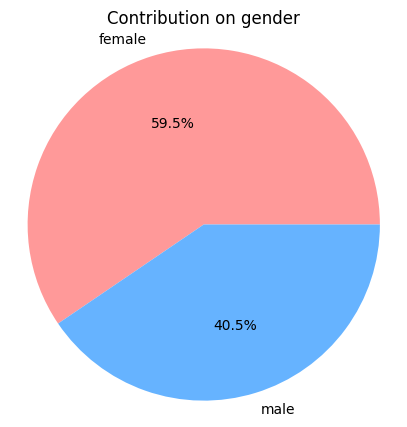

In [ ]:
# Get the female and male counts
gender_counts_all = new_data['gender'].value_counts()

colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(5, 5))
plt.pie(gender_counts_all, labels=gender_counts_all.index, autopct='%1.1f%%', colors=colors)
plt.title('Contribution on gender')
plt.axis('equal')
plt.show()


### What is the race of these highly scoring students? use a pie chart to plot the distribution

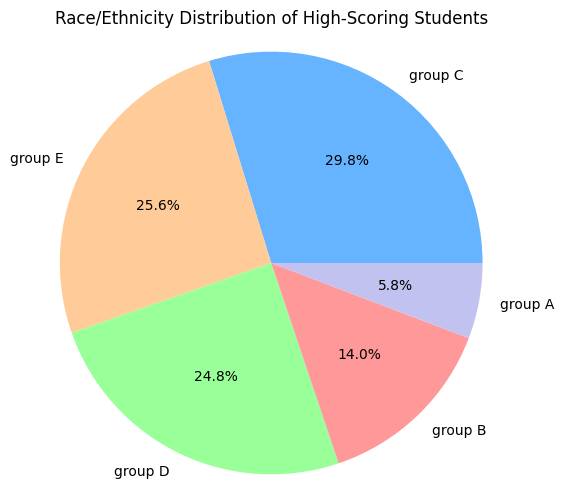

In [ ]:
race_counts = new_data['race/ethnicity'].value_counts()

colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff9999', '#c2c2f0']

plt.figure(figsize=(6, 6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Race/Ethnicity Distribution of High-Scoring Students')
plt.axis('equal')
plt.show()


### Extract information about the students who score above 90 on math

In [ ]:
data_math = data[data["math score"] > 90]
data_math.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
34,male,group E,some college,standard,none,97,87,82
104,male,group C,some college,standard,completed,98,86,90
114,female,group E,bachelor's degree,standard,completed,99,100,100
121,male,group B,associate's degree,standard,completed,91,89,92
149,male,group E,associate's degree,free/reduced,completed,100,100,93


### Plot a pie chart showing the distribution of students who scored well on math v.s. others who scored below 90

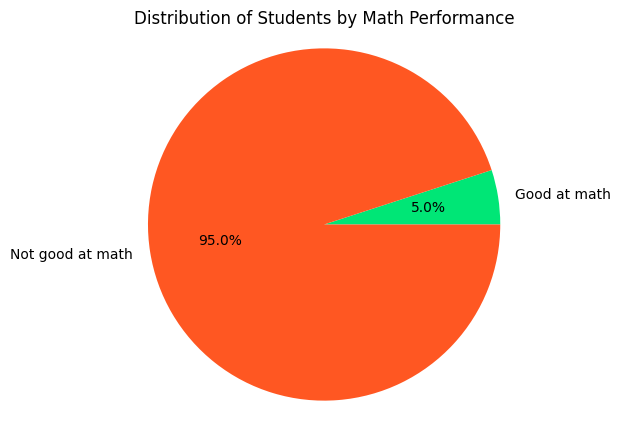

In [ ]:
good_at_math = data[data["math score"] > 90].shape[0]
not_good_at_math = data[data["math score"] <= 90].shape[0]

sizes = [good_at_math, not_good_at_math]
labels = ["Good at math", "Not good at math"]
colors = ["#00E676", "#FF5722"]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Students by Math Performance")
plt.axis('equal')
plt.show()


### Check for missing data in the dataset

In [ ]:
data.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## 3. Data Preprocessing

### Get a copy of the original dataset and call it ml_students_df

In [ ]:
ml_students_df = data.copy()

### Create an average_score column that averages the math, reading, and writing scores. Then, add this column to the ml_student_df dataframe

In [ ]:
# Create the average_score column
ml_students_df["average_score"] = (
    ml_students_df[["math score", "reading score", "writing score"]].mean(axis=1)
)

# Display the new column
ml_students_df["average_score"].head()

,average_score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333


### Create a status column, which indicates if a student has passed by on his/her grade. The student passes if the average grade is above or equal to 60

In [ ]:
ml_students_df["status"] = np.where(ml_students_df["average_score"] >= 60, "Passed", "Failed")

ml_students_df["status"].head()

,status
0,Passed
1,Passed
2,Passed
3,Failed
4,Passed


### Drop the following columns: math score, reading score, writing score, and average_score

In [ ]:
ml_students_df = ml_students_df.drop(
    ["math score", "reading score", "writing score", "average_score"],
    axis=1
)

ml_students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,status
0,female,group B,bachelor's degree,standard,none,Passed
1,female,group C,some college,standard,completed,Passed
2,female,group B,master's degree,standard,none,Passed
3,male,group A,associate's degree,free/reduced,none,Failed
4,male,group C,some college,standard,none,Passed


### Apply one hot encoding on all columns except the status column

In [ ]:
ml_students_encoded = pd.get_dummies(
    ml_students_df,
    columns=[col for col in ml_students_df.columns if col != 'status']
)

ml_students_encoded.head()

,status,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,Passed,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,Passed,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,Passed,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,Failed,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,Passed,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


### Convert the status column to categorical values of 0 or 1. 0 for failed and 1 for passed.

In [ ]:
status_mapping = {"Passed": 1, "Failed": 0}
ml_students_df["status"] = ml_students_df["status"].map(status_mapping)

### Define the features and target

In [27]:
X = ml_students_df.drop("status", axis=1)
y = ml_students_df["status"]

#### split the data into training and test datasets

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 4. Build and train a K-nearest neighbors classifier
### Simply run the following cells to make sure that you get similar model performance

### We will be studying the K-nearest neighbors classifier model in more details in subsequent weeks

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = pd.get_dummies(ml_students_df.drop("status", axis=1))

y = ml_students_df["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=13)

### Checking the model performance on training dataset

In [33]:
knn_training_accuracy = knn.score(X_train, y_train, sample_weight=None)
print(knn_training_accuracy)

0.76375


### Checking the model performance on testing dataset

In [34]:
knn_testing_accuracy = knn.score(X_test, y_test, sample_weight=None)
print(knn_testing_accuracy)

0.675
